# Import data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

import time

In [ ]:
df_train = pd.read_csv('train_all_features.csv')
df_val = pd.read_csv('val_all_features.csv')
df_test = pd.read_csv('test_all_features.csv')

In [ ]:
df_train.head(5)

,Unnamed: 0,files,labels,train_or_val,object_count,lum_hist_1,lum_hist_2,lum_hist_3,lum_hist_4,lum_hist_5,...,res_991,res_992,res_993,res_994,res_995,res_996,res_997,res_998,res_999,res_1000
0,0,./seg_train/seg_train/buildings/0.jpg,building,training,5,410,257,331,478,617,...,4.167721e-06,2.158211e-06,5.904865e-07,1.288369e-06,9.919127e-07,1.897755e-05,0.000028,4.818478e-07,8.228128e-06,8.343523e-07
1,1,./seg_train/seg_train/buildings/1001.jpg,building,training,17,508,522,919,1239,1236,...,1.696466e-06,2.202982e-08,1.420953e-08,6.721601e-08,3.885782e-08,1.968007e-07,0.000001,1.973723e-08,6.154577e-07,4.719319e-07
2,2,./seg_train/seg_train/buildings/10014.jpg,building,training,46,451,640,491,586,589,...,9.414865e-07,3.305464e-07,1.655347e-07,2.085787e-08,6.880236e-07,5.563913e-06,0.000012,6.165252e-07,2.910279e-05,1.475344e-06
3,3,./seg_train/seg_train/buildings/10018.jpg,building,training,36,353,226,5700,7166,1368,...,2.472801e-07,2.811269e-07,7.010432e-06,4.059911e-07,3.939365e-06,2.139476e-07,0.000024,6.369614e-08,3.868958e-05,3.412553e-05
4,4,./seg_train/seg_train/buildings/10056.jpg,building,training,40,245,289,453,520,724,...,1.937030e-05,2.277373e-07,3.255058e-07,5.757029e-07,2.479512e-07,8.827865e-06,0.000007,3.589234e-07,5.496050e-06,7.935602e-06


Split training data

In [ ]:
df_train['labels_numeric'] = df_train['labels'].map({'building':0,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5})

In [ ]:
# Set y_train
y_train = df_train['labels_numeric']
# Set X_train
X_train = df_train.iloc[:,4:]

Split test data


In [ ]:
df_test['labels_numeric'] = df_test['labels'].map({'building':0,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5})
# Set y_test
y_test = df_test['labels_numeric']
# Set X_test
X_test = df_test.iloc[:,3:]

Split val data

In [ ]:
df_val['labels_numeric'] = df_val['labels'].map({'building':0,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5})
# Set y_val
y_val = df_val['labels_numeric']
# Set X_test
X_val = df_val.iloc[:,4:]

# One vs Rest Logistic Regression Implementation

One versus rest strategy (For each model, it considers one class as the positive class and groups all other classes together as the negative class. This results in multiple binary classifiers, one for each class. During prediction, the class with the highest confidence score (probability) among all binary classifiers is assigned.)

In [ ]:
# Initialize model
model = LogisticRegression(multi_class='ovr', max_iter=1000)

# Measure the time it takes to train the model
start_time = time.time()

# Train the model
model.fit(X_train, y_train)

training_time = time.time() - start_time

print(f"Training Time: {training_time:.4f} seconds")


# Measure the time it takes to make predictions
start_time = time.time()

# Make predictions
y_pred = model.predict(X_test)


prediction_time = time.time() - start_time

print(f"Prediction Time: {prediction_time:.4f} seconds")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Time: 403.6830 seconds
Prediction Time: 0.2701 seconds
Accuracy: 0.8503333333333334


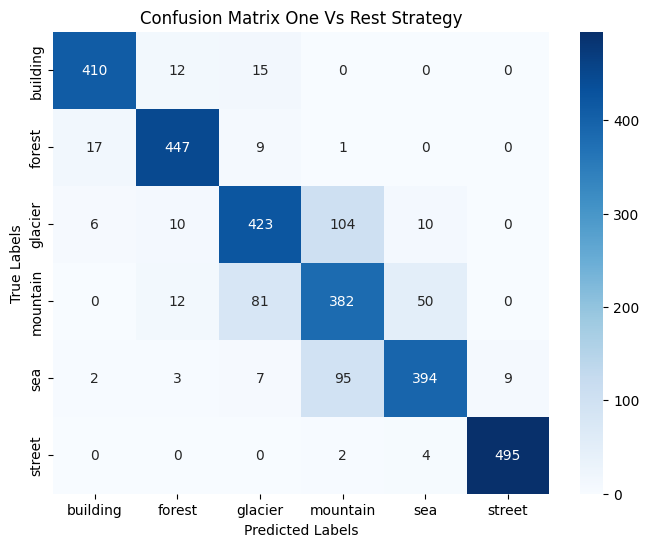

In [ ]:
cm = confusion_matrix(y_test, y_pred)
y = df_train['labels'].unique()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix One Vs Rest Strategy")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Try different hyperparameters

100 Iterations

In [ ]:
# Initialize model
model = LogisticRegression(multi_class='ovr', max_iter=100)

# Measure the time it takes to train the model
start_time = time.time()

# Train the model
model.fit(X_train, y_train)

training_time = time.time() - start_time

print(f"Training Time: {training_time:.4f} seconds")


# Measure the time it takes to make predictions
start_time = time.time()

# Make predictions
y_pred = model.predict(X_test)


prediction_time = time.time() - start_time

print(f"Prediction Time: {prediction_time:.4f} seconds")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Time: 40.9692 seconds
Prediction Time: 0.1445 seconds
Accuracy: 0.6136666666666667


500 iterations

In [ ]:
# Initialize model
model = LogisticRegression(multi_class='ovr', max_iter=500)

# Measure the time it takes to train the model
start_time = time.time()

# Train the model
model.fit(X_train, y_train)

training_time = time.time() - start_time

print(f"Training Time: {training_time:.4f} seconds")


# Measure the time it takes to make predictions
start_time = time.time()

# Make predictions
y_pred = model.predict(X_test)


prediction_time = time.time() - start_time

print(f"Prediction Time: {prediction_time:.4f} seconds")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Time: 184.3733 seconds
Prediction Time: 0.1734 seconds
Accuracy: 0.8046666666666666


2000 iterations

In [ ]:
# Initialize model
model = LogisticRegression(multi_class='ovr', max_iter=2000)

# Measure the time it takes to train the model
start_time = time.time()

# Train the model
model.fit(X_train, y_train)

training_time = time.time() - start_time

print(f"Training Time: {training_time:.4f} seconds")


# Measure the time it takes to make predictions
start_time = time.time()

# Make predictions
y_pred = model.predict(X_test)


prediction_time = time.time() - start_time

print(f"Prediction Time: {prediction_time:.4f} seconds")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Time: 751.1000 seconds
Prediction Time: 0.1565 seconds
Accuracy: 0.894


Use 2000 iterations model to test data

Accuracy: 0.9126447016918967


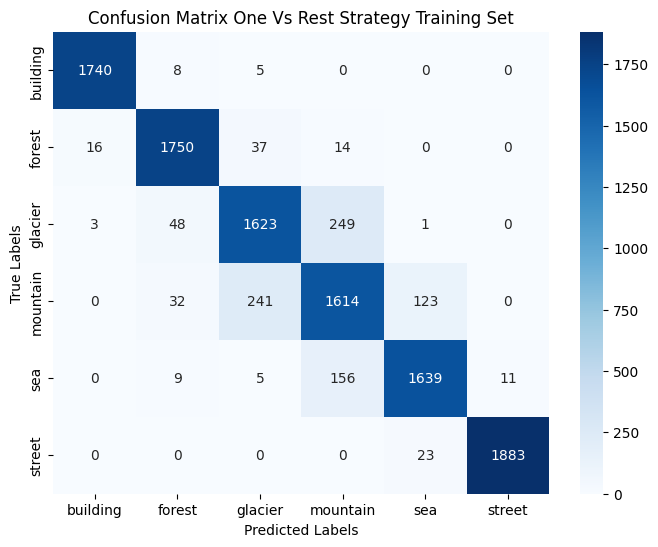

In [ ]:
# Test training set
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy}")


cm = confusion_matrix(y_train, y_pred)
y = df_train['labels'].unique()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix One Vs Rest Strategy Training Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Accuracy: 0.894


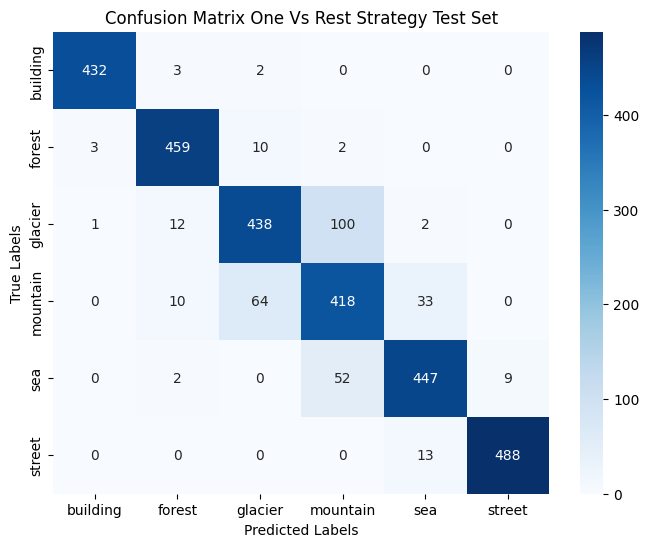

In [ ]:
# Test test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
y = df_train['labels'].unique()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix One Vs Rest Strategy Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Accuracy: 0.905848787446505


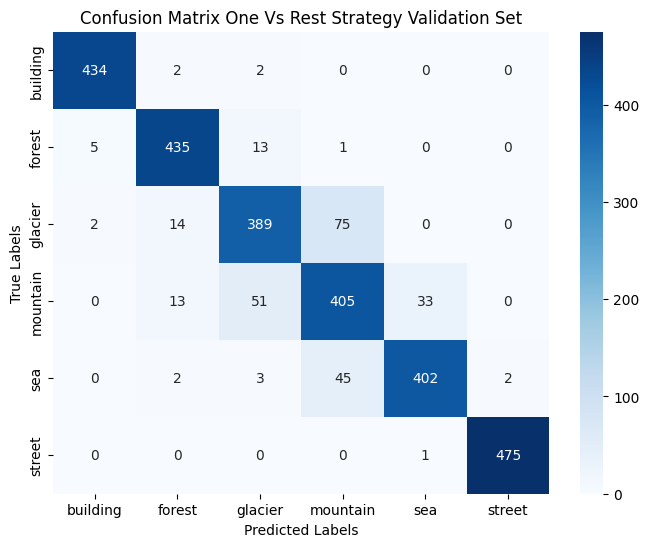

In [ ]:
# Test validation set
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_val, y_pred)
y = df_train['labels'].unique()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix One Vs Rest Strategy Validation Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Unused Gridsearch

Hyperparameter Search

In [ ]:
# Initialize model
model = LogisticRegression(multi_class='ovr', max_iter=1000)

# Define hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)

# Perform hyperparameter search on subsets of validation data
grid_search.fit(X_val, y_val)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters on the full training data
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8366666666666667


# Multinomial Logistic Regression Implementation


Multinomial strategy (the algorithm fits a single logistic regression model over the entire set of classes utilizing a softmax function)

In [ ]:
# Initialize model
model = LogisticRegression(multi_class='multinomial', solver = 'lbfgs', max_iter = 1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6766666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


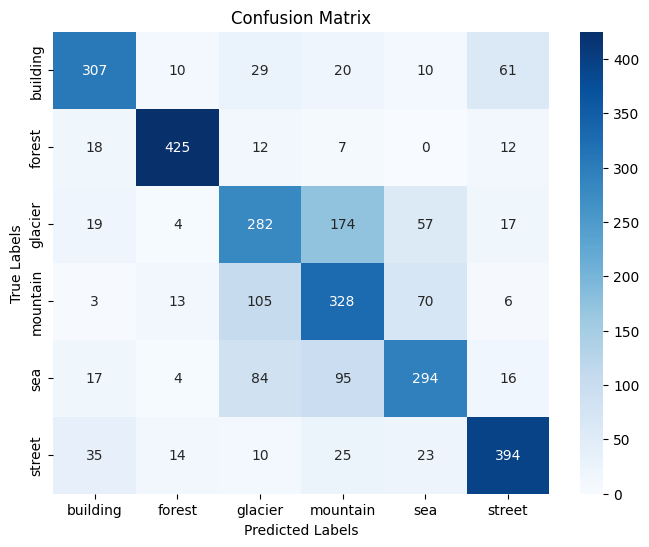

In [ ]:
cm = confusion_matrix(y_test, y_pred)
y = df_train['labels'].unique()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix Multinomial Strategy")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
df_train['labels'].unique()

array(['building', 'forest', 'glacier', 'mountain', 'sea', 'street'],
      dtype=object)

# Implement Decision Tree

In [ ]:
# Create and train a decision tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree}")

Decision Tree Accuracy: 1.0


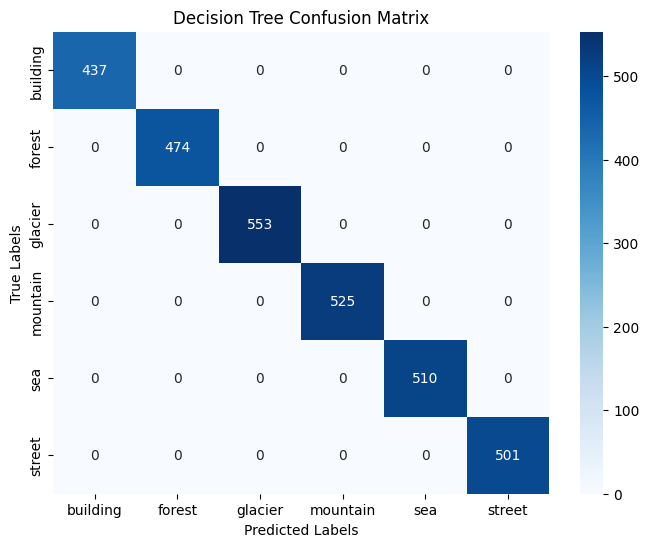

In [ ]:
# Create a confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
y_pred_tree_val = tree_model.predict(X_val)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree}")

Decision Tree Accuracy: 1.0
